# Notebook Imports

In [166]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# Gather Data
[Source: Original Research Paper]( https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)

In [66]:
boston_dataset = load_boston()

In [67]:
 type(boston_dataset) # we need to covert to a dataset

sklearn.utils.Bunch

## Questions to ask yourself about the data set
### Source of the data
### Description of the data set
### Number of data points
### Number of features
### Names of feature
### Description of the features

In [68]:
dir(boston_dataset) # shows list of attributes

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [69]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Data points and features

In [70]:
type(boston_dataset.data)

numpy.ndarray

In [71]:
boston_dataset.data.shape # showing 506 inputs and 13 attributes

(506, 13)

In [72]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [73]:
boston_dataset.target # actual prices in thousands

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with pandas dataframes

In [74]:
# create a panda dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

#Add column with the price(target)
data['PRICE'] = boston_dataset.target

In [75]:
data.head() # top rows look like this

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [76]:
data.tail() # bottom rows look like this

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [77]:
data.count() # will show up number of rows for each column
# instance is an object in python and instance in ML means entry

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - check for missing values

In [78]:
pd.isnull(data) # shows t or f is value is missing
pd.isnull(data).any()


CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

## Visualizing Data - Histograms, Distributions, and Bar Charts

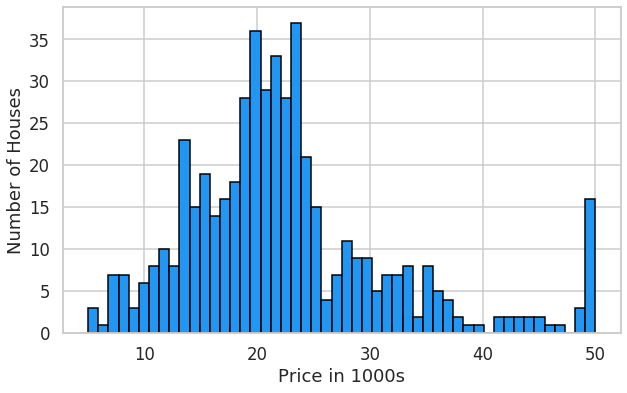

In [79]:
plt.figure(figsize=[10,6])
plt.hist(data['PRICE'], bins=50, ec='black', color='#2196f3')
plt.xlabel('Price in 1000s')
plt.ylabel('Number of Houses')
plt.show()

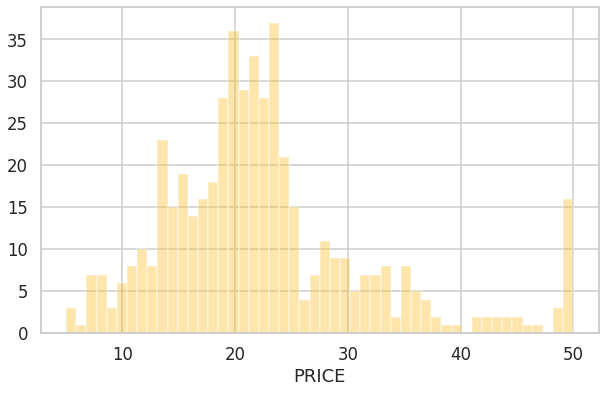

In [80]:
plt.figure(figsize=[10,6])
sns.distplot(data['PRICE'], bins=50, hist=True, kde=False, color='#fbc02d')
plt.show() # kde shows probability density function

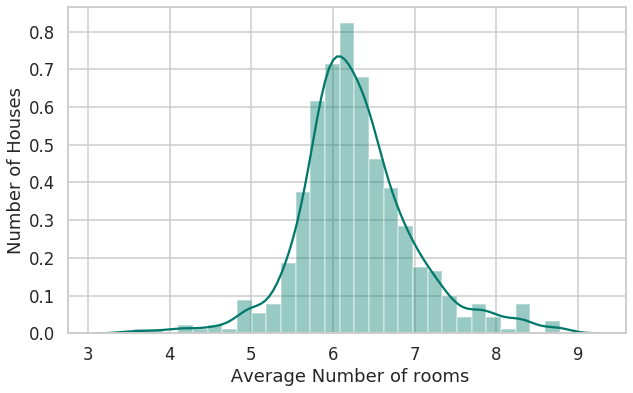

In [81]:
plt.figure(figsize=[10,6])
sns.distplot(data['RM'], color='#00796b')
plt.xlabel(' Average Number of rooms')
plt.ylabel('Number of Houses')
plt.show() # kde shows probability density function

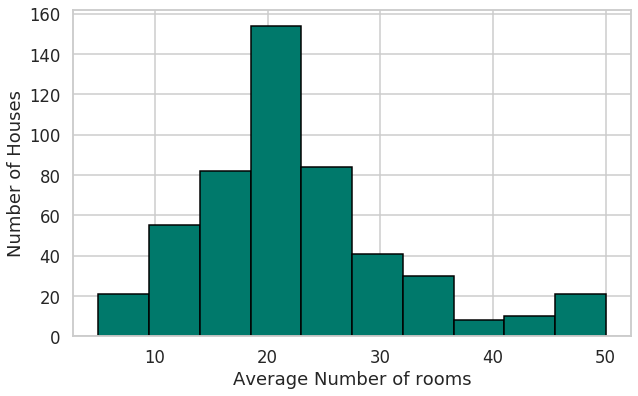

In [82]:
plt.figure(figsize=[10,6])
plt.hist(data['PRICE'], ec='black',  color='#00796b')
plt.xlabel('Average Number of rooms')
plt.ylabel('Number of Houses')
plt.show()

In [83]:
data['RM'].mean()

6.284634387351779

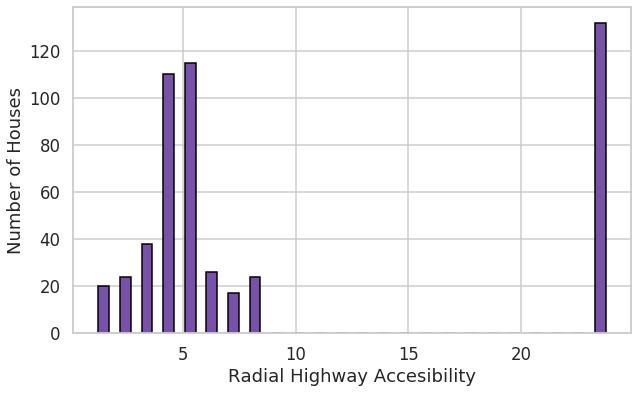

In [84]:
plt.figure(figsize=[10,6])
plt.hist(data['RAD'], bins=24, rwidth=0.5, ec='black',  color='#7851a9')
plt.xlabel('Radial Highway Accesibility')
plt.ylabel('Number of Houses')
plt.show() #understand mesaurments in rad to correctly display information in bins

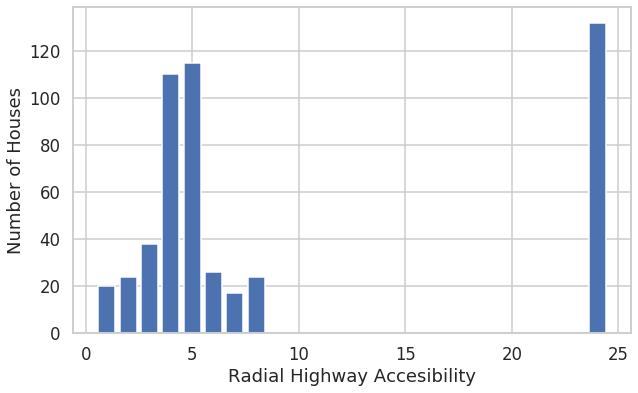

In [85]:
frequency = data['RAD'].value_counts()
# type(frequency)
# frequency.index
# frequency.axes[0]
plt.figure(figsize=[10,6])
plt.bar(frequency.index, height=frequency)
plt.ylabel('Number of Houses')
plt.xlabel('Radial Highway Accesibility')
plt.show()

In [86]:
data['CHAS'].value_counts() #dummy variables to display booleans

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistic

In [87]:
data['PRICE'].min()

5.0

In [88]:
data['PRICE'].max()

50.0

In [89]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [90]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [91]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [92]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [93]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation
## $$ \rho_{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [94]:
data['PRICE'].corr(data['RM'])

0.6953599470715393

In [95]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375616

In [96]:
data.corr() #Pearson correlation 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### Multicollinearity - when two or more variables are highly correlated so they do not provide unique attributes to the regression thus can make regression unreliable

In [97]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

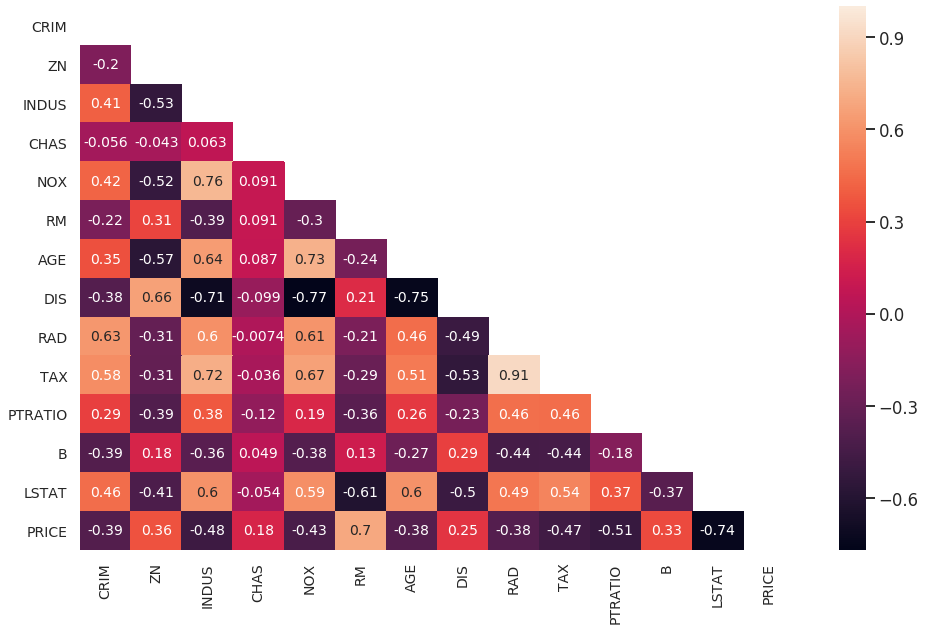

In [98]:
plt.figure(figsize=[16,10])
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size":14}, )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.set_style('white')
plt.show()
## Look for strength and direction
## Pearson method only works for continous variable so things with dummy variable will not work
## Check if features are relative and identify strong correlation

## Continous data only
## Correlation is not causation
## Look at statistic with charts
## Linear relationship only

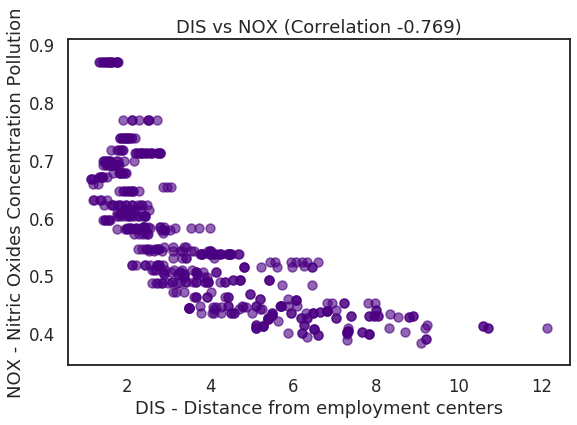

In [99]:
nox_dis_corr = round(data['NOX'].corr(data['DIS']),3 )

plt.figure(figsize=(9,6))

plt.scatter(x=data['DIS'],y=data['NOX'], alpha=0.6, s=80, color='indigo')
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})')
plt.xlabel('DIS - Distance from employment centers')
plt.ylabel('NOX - Nitric Oxides Concentration Pollution')
plt.show()

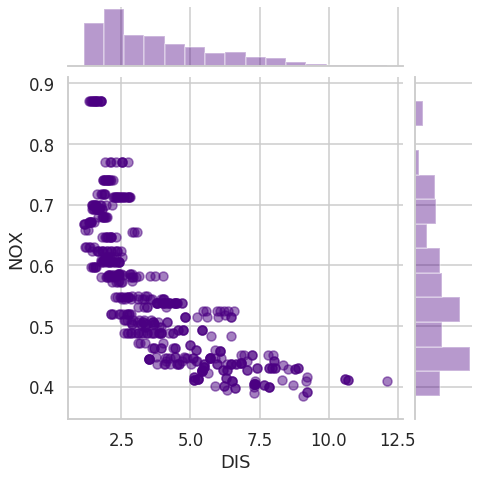

In [100]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], joint_kws={'alpha':0.5}, color='indigo', height=7)

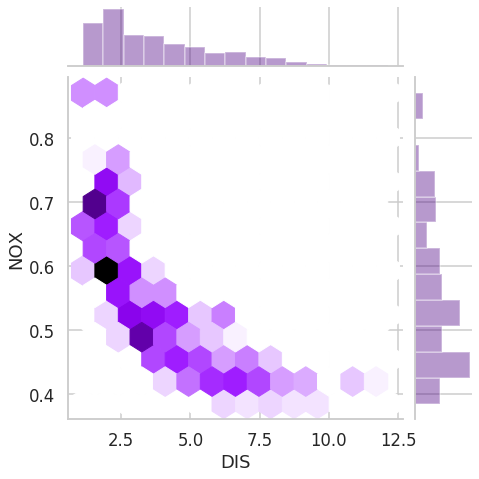

In [101]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='hex', color='indigo', height=7)
# hex aggregates the data in a hex grid

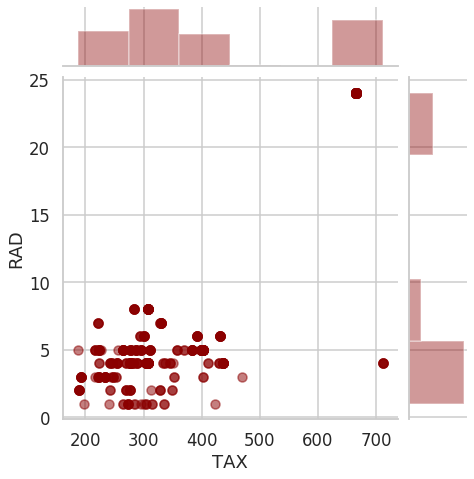

In [102]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], joint_kws={'alpha':0.5}, color='darkred', height=7)

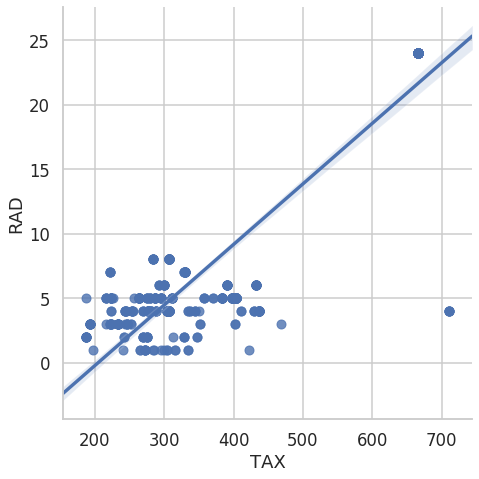

In [103]:
sns.lmplot(x='TAX', y='RAD', data=data, height=7)

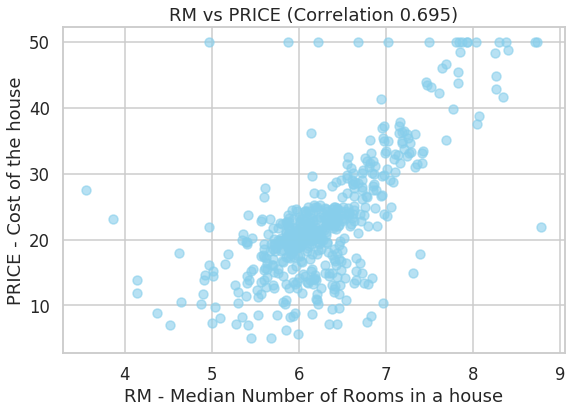

In [104]:
rm_price_corr = round(data['RM'].corr(data['PRICE']),3 )

plt.figure(figsize=(9,6))

plt.scatter(x=data['RM'],y=data['PRICE'], alpha=0.6, s=80, color='skyblue')
plt.title(f'RM vs PRICE (Correlation {rm_price_corr})')
plt.xlabel('RM - Median Number of Rooms in a house')
plt.ylabel('PRICE - Cost of the house')
plt.show()

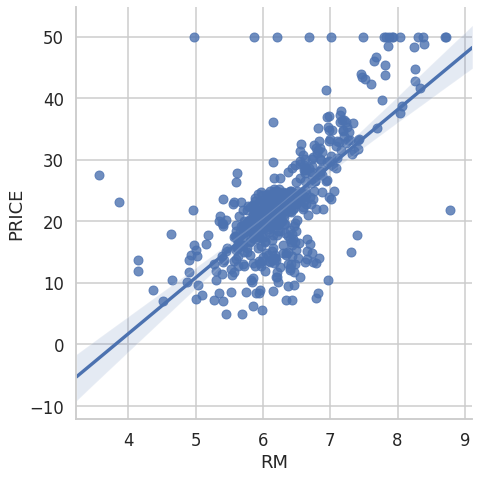

In [105]:
sns.lmplot(x='RM', y='PRICE', data=data, height=7)

In [106]:
# ## Microbenchmark
# sns.pairplot(data)
# plt.show()

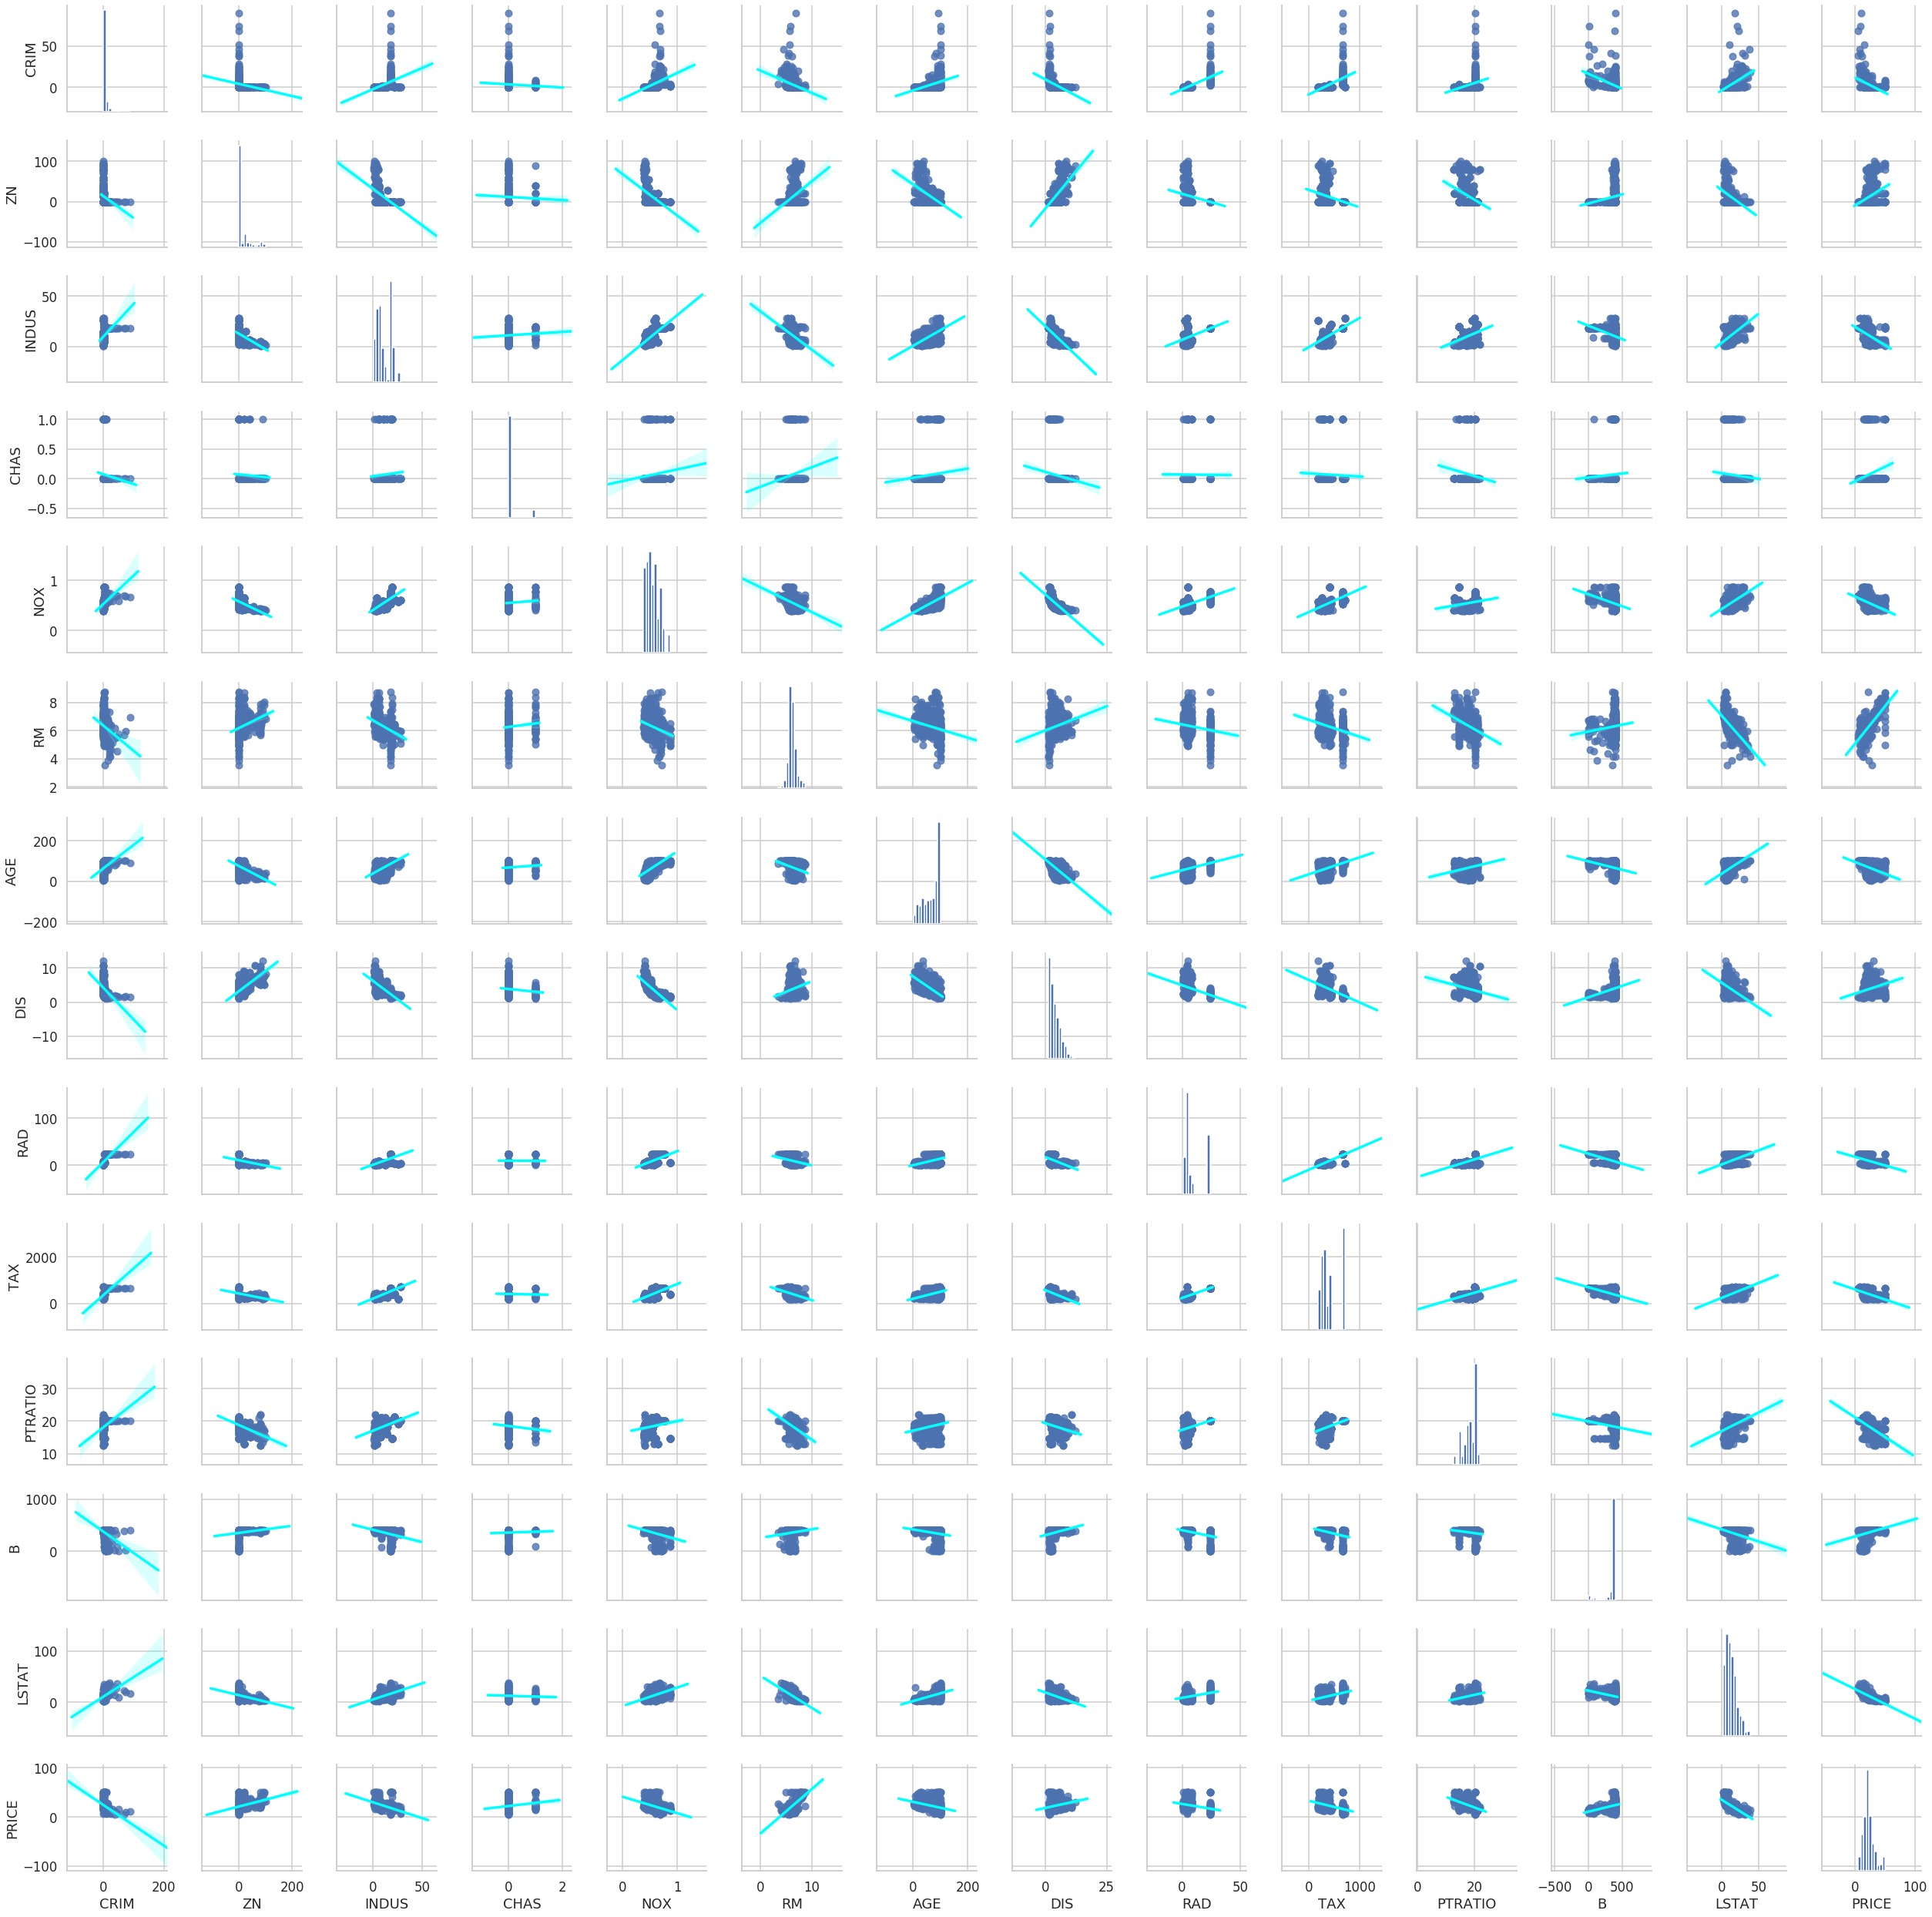

In [107]:
# sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})

### $$ \hat y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n $$
## Our Linear Model
### $$ PR\hat ICE = \theta_0 + \theta_1 RM + \theta_2 NOX + ... + \theta_{13} LSTAT $$

In [108]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    features, prices, test_size=0.2, random_state=10)

# % of training set
len(X_train)/len(features)

X_test.shape[0]/features.shape[0]

0.2015810276679842

## Multivariable Regression

In [109]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115651
Intercept 36.533051382824596


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Data Transformations

In [110]:
data['PRICE'].skew() ## normal data will have 0 
## transformation will help normalize the data 
## log transformations
## if PRICE = 7 >> ln(7) = 1.95
## PRICE =50 >> ln(50) = 3.##

1.1080984082549072

In [111]:
y_log = np.log(data['PRICE'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [112]:
y_log.skew()

-0.33032129530987864

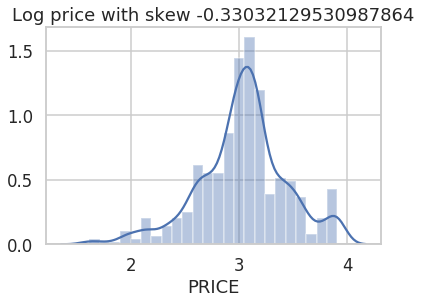

In [113]:
sns.distplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

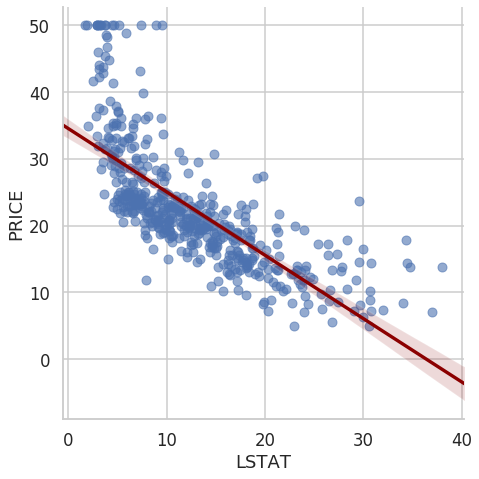

In [114]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=7, 
           scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'})

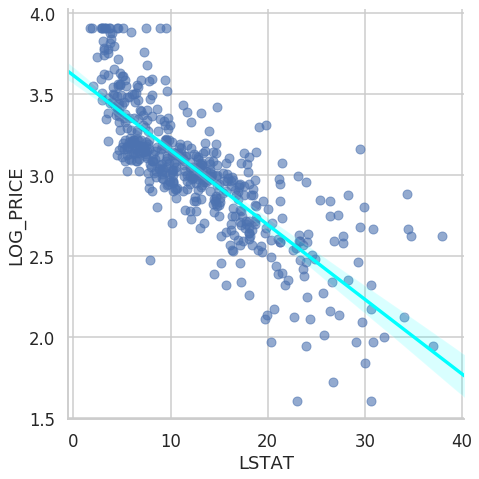

In [115]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height=7, scatter_kws={'alpha':0.6}, line_kws={'color':'cyan'})

## Our Transformed Linear Model
### $$ log(PR\hat ICE) = \theta_0 + \theta_1 RM + \theta_2 NOX + \theta_3 DIS + \theta_4 CHAS +  ... + \theta_{13} LSTAT $$

## Regression using log prices

In [116]:
prices = np.log(data['PRICE']) # using log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    features, prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

## both data returns a better performance
## Reducing the skew in the target created better performance
## higher r squared means a better fit



Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260735
Intercept 4.059943871775192


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [117]:
## Charles river price calculation
print('People are willing to spend this amount of money to live on the Charles River: $',np.e**0.080331*1000) 

People are willing to spend this amount of money to live on the Charles River: $ 1083.6456950439142


## p values and Evaluating Coefficients

In [118]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# results.params
# results.pvalues



pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

# any numbers over 0.2 is insignificant to the model

/home/creator/snap/jupyter/common/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for Multicollineary

$$ TAX = \alpha_0 + \alpha_1 RM + \alpha2 NOX + ... + \alpha_{12}LSTAT $$

$$ VIF_{TAX} = \frac {1}{(1-R_{TAX}^2)} \ $$

In [119]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

1.7145250443932485

In [120]:
print(len(X_incl_const.columns))
X_incl_const.shape[1]

14


14

In [121]:
for i in range(X_incl_const.shape[1]):
    print(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))

597.5487126763895
1.7145250443932485
2.3328224265597597
3.943448822674638
1.0788133385000578
4.410320817897635
1.8404053075678575
3.3267660823099394
4.222923410477865
7.314299817005058
8.508856493040817
1.8399116326514064
1.3386713255364717
2.812544292793036


In [122]:
VIF = []

for i in range(X_incl_const.shape[1]):
    VIF.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))

In [123]:
vif = [variance_inflation_factor(
    exog=X_incl_const.values, exog_idx=i) 
       for i in range(X_incl_const.shape[1]) ]
pd.DataFrame({'coef_name': X_incl_const.columns, 
              'vif': np.around(vif, 2)})

## any vif over 10 is an issue with multicollineary
## conservative is 5 or higher vif

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


In [124]:
import this

### To figure out which features to keep and to throw - use BIC or the Baysian Information Criterion 
### Lower BIC number is better

## Model Simplication and BIC

In [125]:
## Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC: ',results.bic)
print('rsquared: ',results.rsquared)

BIC:  -139.74997769478875
rsquared:  0.7930234826697583


In [126]:
## Reduced model excluding INDUS

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC: ',results.bic)
print('rsquared: ',results.rsquared)

## these results says that BIC is better and the fit stays the same
## safe to remove INDUS

BIC:  -145.1450885559114
rsquared:  0.7927126289415162


In [127]:
## Reduced model excluding INDUS and AGE

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC: ',results.bic)
print('rsquared: ',results.rsquared)

## these results says that BIC is better and the fit stays the same
## safe to remove INDUS and AGE

BIC:  -149.49934294224678
rsquared:  0.7918657661852815


In [128]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1, sort=False)

,coef,p-value,coef,p-value,coef,p-value
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


$ \hat y  $ is predicted value and y is actual value

$$ residual =  y-\hat y $$

When plotted these will show the data plots health

An even cloud shows a healthy residual relationship around the center of the graph

remember all models are wrong but some models are useful

## Residuals and Residual Plots

Text(0.5, 1.0, 'Actual vs Predicted log prices: $y_i$ vs $\\hat y_i$ (Corr 0.89)')

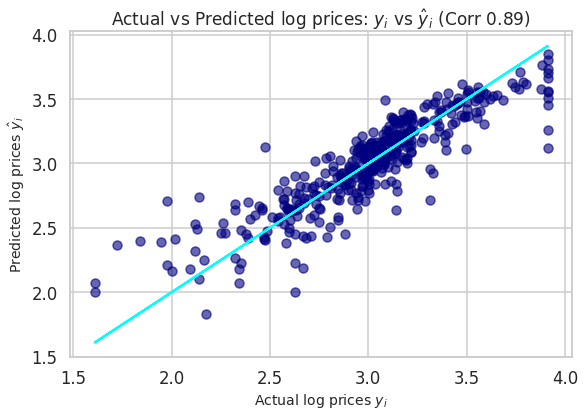

In [147]:
# Modified Model: transformed (using log prices) & simplified (droppping two features)

prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    features, prices, test_size=0.2, random_state=10)

# Using statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals 
# residuals = y_train - results.fittedvalues
# residuals = results.resid
# residuals # its a pandas series
# residuals.describe()

# Graph of Actual vs. Predicted Prices

corr = round(y_train.corr(results.fittedvalues),2)

plt.figure(figsize=(9,6))

plt.scatter(x=y_train, y=results.fittedvalues, color='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y_i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)



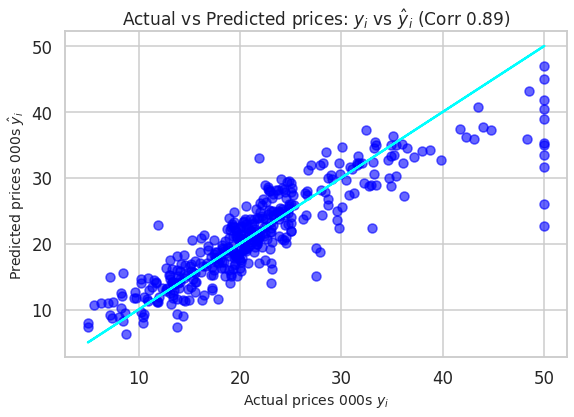

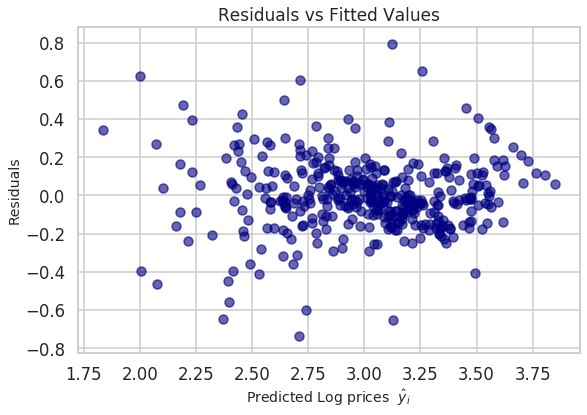

In [168]:
# Modified Model: transformed (using log prices) & simplified (droppping two features)

prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    features, prices, test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices

corr = round(y_train.corr(results.fittedvalues),2)
plt.figure(figsize=(9,6))
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, color='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y_i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

# Residuals vs Predicted values

plt.figure(figsize=(9,6))
plt.scatter(x=results.fittedvalues, y=results.resid, color='navy', alpha=0.6)

plt.xlabel('Predicted Log prices  $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

# Mean Squared Error
reduced_log_mse = round(results.mse_resid,3)
reduced_log_rsquared = round(results.rsquared,3)

Text(0.5, 1.0, 'Log price model: residuals Skew (0.118) Mean (-0.0)')

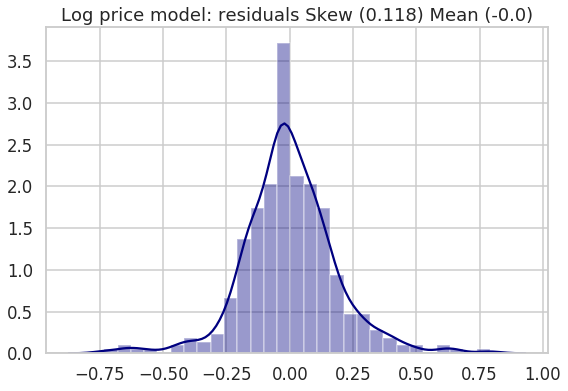

In [155]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(), 3)
plt.figure(figsize=(9,6))
sns.distplot(results.resid, color='navy')
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')

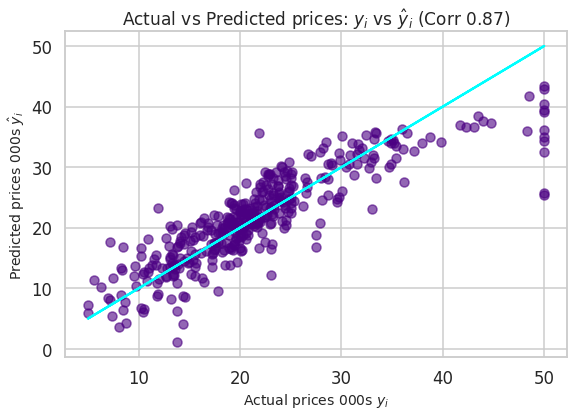

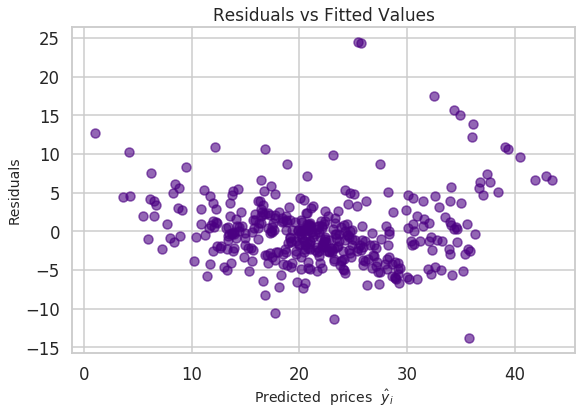

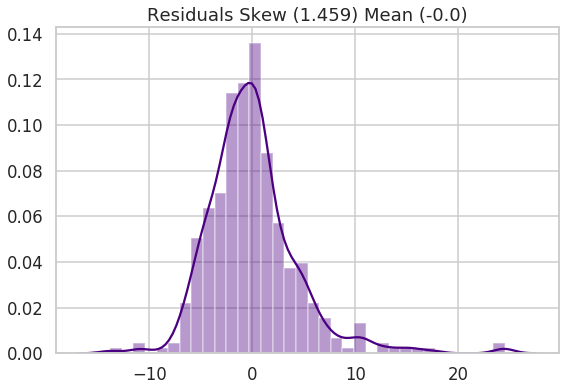

In [167]:
# Original model: normal prices & all featires

prices = data['PRICE']
features = data.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    features, prices, test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices

corr = round(y_train.corr(results.fittedvalues),2)

plt.figure(figsize=(9,6))

plt.scatter(x=y_train, y=results.fittedvalues, color='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y_i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)


# Residuals vs Predicted values

plt.figure(figsize=(9,6))
plt.scatter(x=results.fittedvalues, y=results.resid, color='indigo', alpha=0.6)

plt.xlabel('Predicted  prices  $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

# Residual Distribution
resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(), 3)
plt.figure(figsize=(9,6))
sns.distplot(results.resid, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')

# Mean Squared Error
full_normal_mse = round(results.mse_resid,3)
full_normal_rsquared = round(results.rsquared,3)

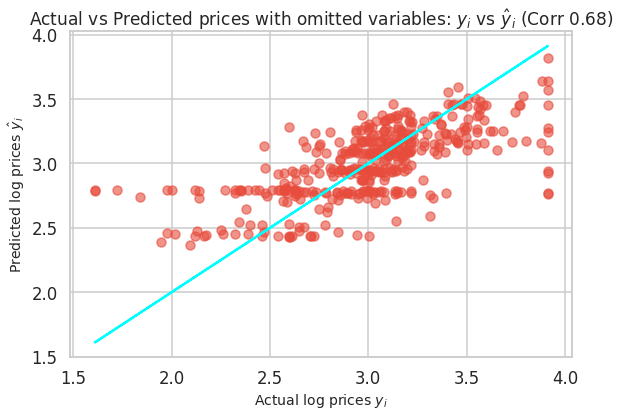

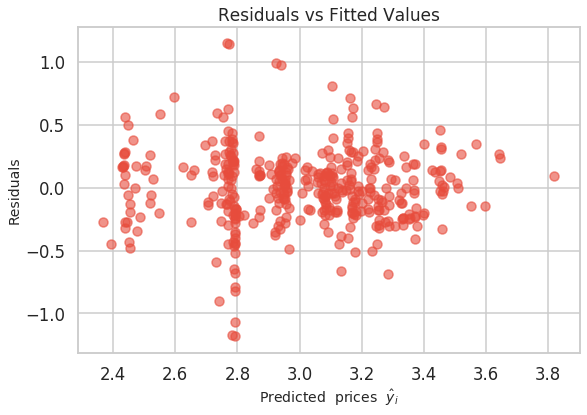

In [169]:
# Model omitting key features using log prices

prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    features, prices, test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices

corr = round(y_train.corr(results.fittedvalues),2)

plt.figure(figsize=(9,6))

plt.scatter(x=y_train, y=results.fittedvalues, color='#e74c3c', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices with omitted variables: $y_i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)


# Residuals vs Predicted values

plt.figure(figsize=(9,6))
plt.scatter(x=results.fittedvalues, y=results.resid, color='#e74c3c', alpha=0.6)

plt.xlabel('Predicted  prices  $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

# where plots are lined up it means that some data is missing that is important

# Mean Squared Error
omitted_var_log_mse = round(results.mse_resid,3)
omitted_var_rsquared = round(results.rsquared,3)

In [178]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared], 
              'MSE': [reduced_log_mse, full_normal_mse, omitted_var_log_mse],
             'RMSE': np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_log_mse])},
            index=['Reduced Log Model', 'Full Normal Price Normal', 'Omitted Var Model'])


,R-Squared,MSE,RMSE
Reduced Log Model,0.792,0.035,0.187083
Full Normal Price Normal,0.750,19.921,4.463295
Omitted Var Model,0.460,0.090,0.300000


-1 - +1 Standard Deviations is 68 % of observed prediction
-2 - +2 Standard Deviations is 95% of observed prediction
on a normal distribution

### Root Mean Squared Error (RMSE)

$$ RMSE = \sqrt {MSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2} $$

### Prediction Interval  from $\hat y$ 95% 2 deviations
#### Lower Bound Prediction $2RMSE$
#### Higher Bound Prediction $-2RMSE$ 

In [180]:
print('1 Standard Deviation in log prices is', np.sqrt(reduced_log_mse))
print('2 Standard Deviation in log prices is', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
lower_bound =np.log(30) - 2*np.sqrt(reduced_log_mse)

print('The upper bound in log prices for a 95% prediction interval is', upper_bound)
print('The upper bound in normal prices for a 95% prediction interval is', np.e**upper_bound*1000)
print('The lower bound in log prices for a 95% prediction interval is', lower_bound)
print('The lower bound in normal prices for a 95% prediction interval is', np.e**lower_bound*1000)

1 Standard Deviation in log prices is 0.18708286933869708
2 Standard Deviation in log prices is 0.37416573867739417
The upper bound in log prices for a 95% prediction interval is 3.7753631203395495
The upper bound in normal prices for a 95% prediction interval is 43613.34233239937
The lower bound in log prices for a 95% prediction interval is 3.0270316429847615
The lower bound in normal prices for a 95% prediction interval is 20635.886906824155
